In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [10]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
dataset.shape

(200, 5)

In [13]:
data=dataset.drop(['Gender'], axis=1)

In [14]:
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [15]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
data.isna().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [17]:
data.dropna()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


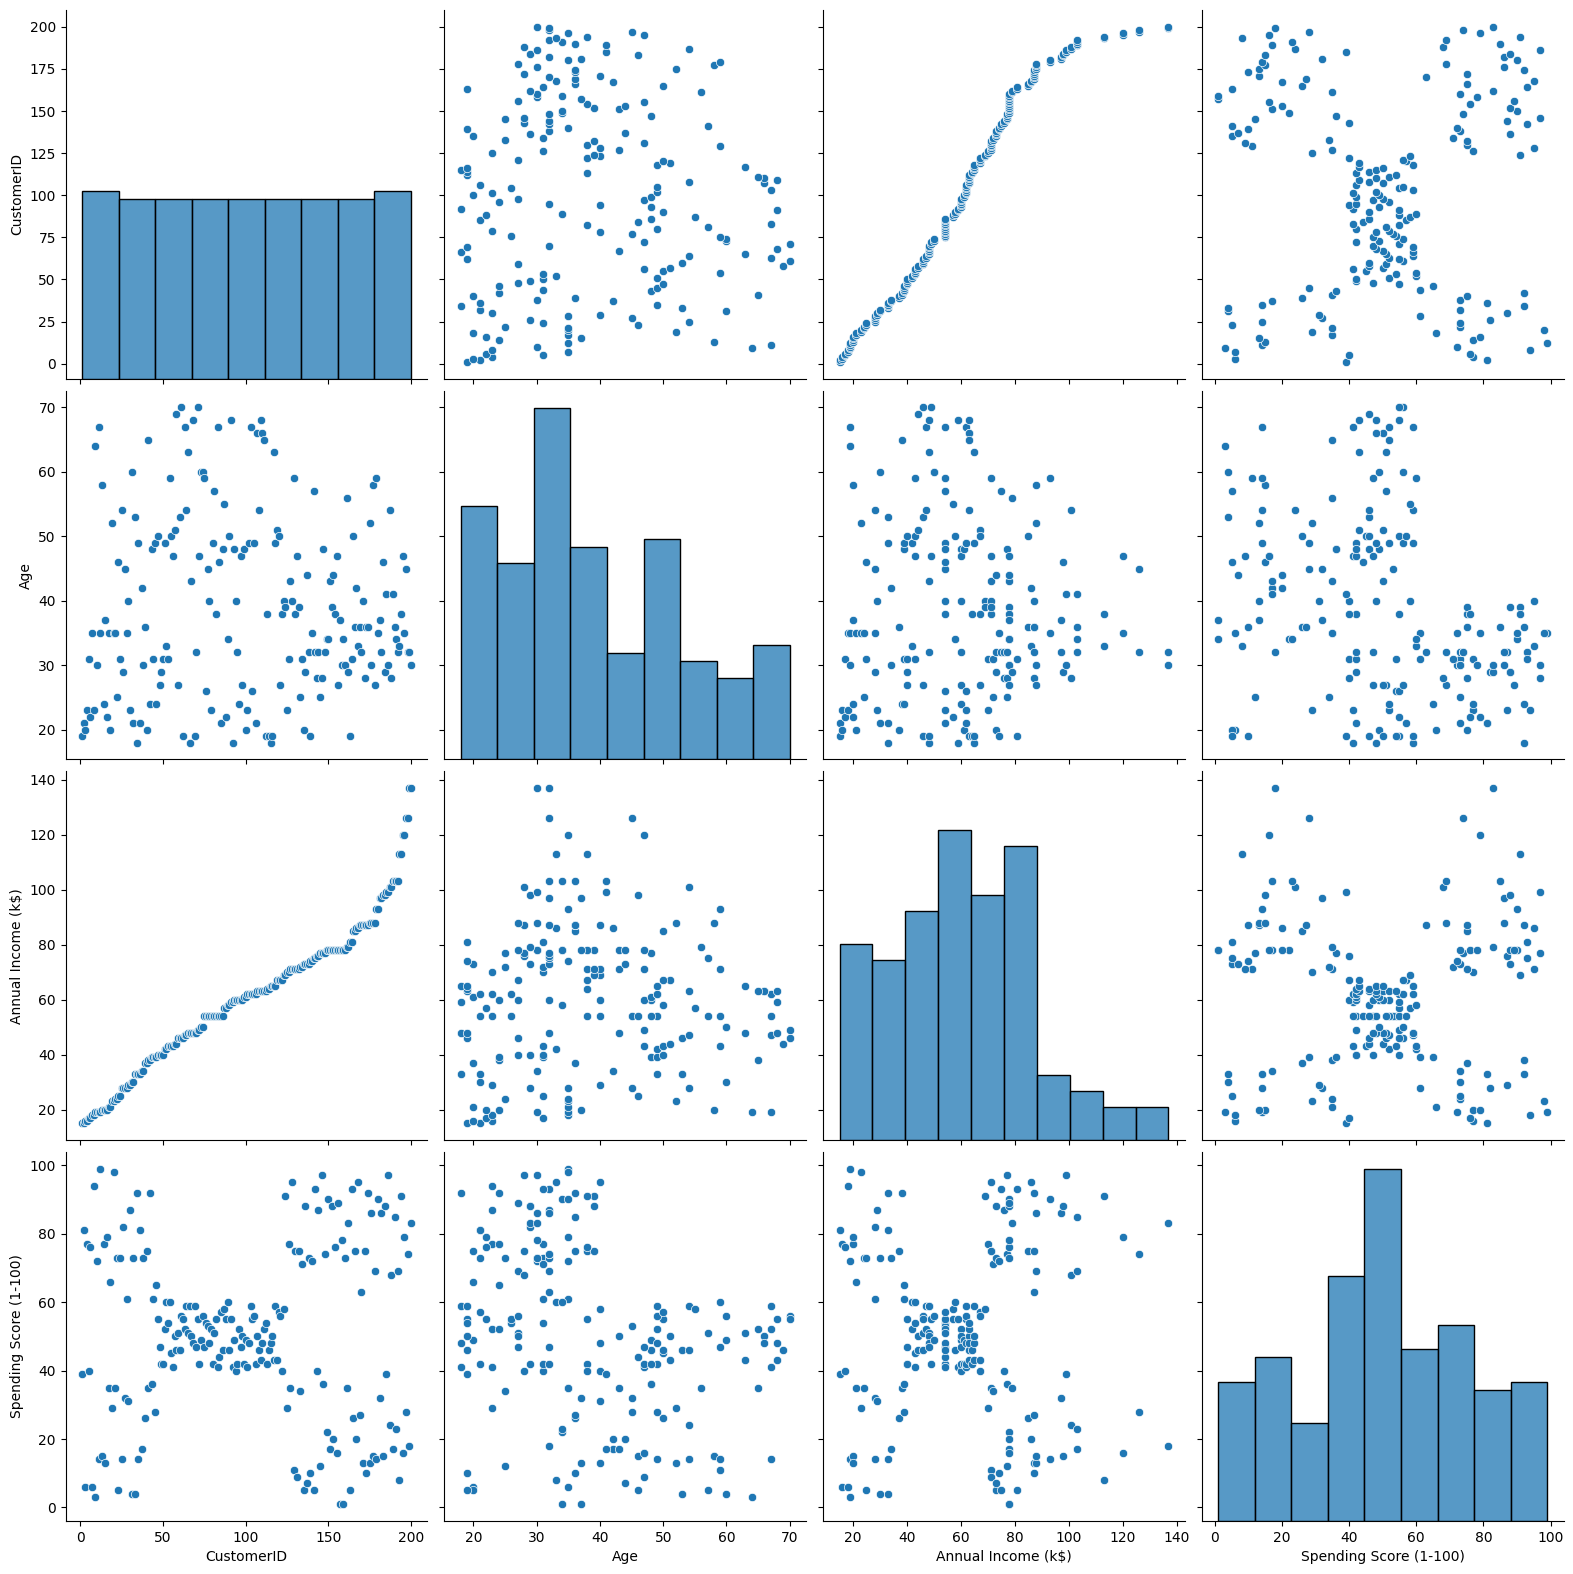

In [18]:
sns.pairplot(data.dropna(), size=4, kind='scatter')

In [19]:
corr_matrix = data.corr()
corr_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

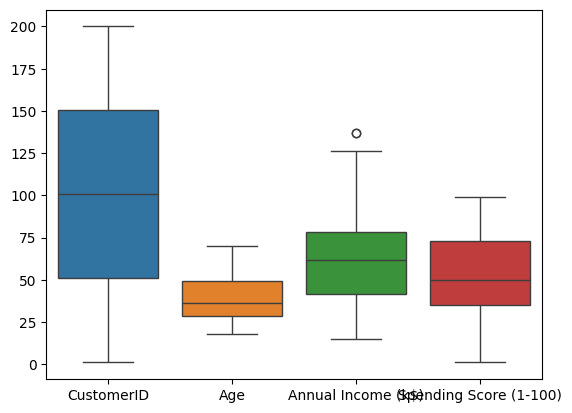

In [20]:
sns.boxplot(data=data)

In [21]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


## K-MEANS

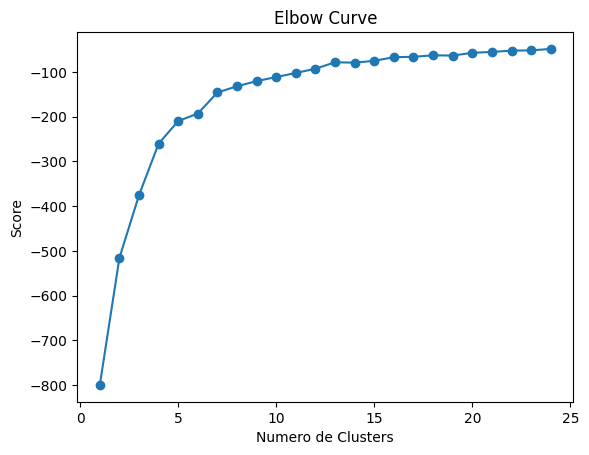

In [95]:
Nc = range(1,25)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score=[kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Numero de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [22]:
 kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[-0.73402218,  0.1630352 , -0.68386341, -0.01316557],
       [ 1.02928406,  0.12559171,  0.97103028, -1.18114598],
       [ 0.96091531, -0.52828258,  0.88451291,  1.08355289]])

In [23]:
labels = kmeans.labels_
C = kmeans.cluster_centers_
colores=['red','green','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

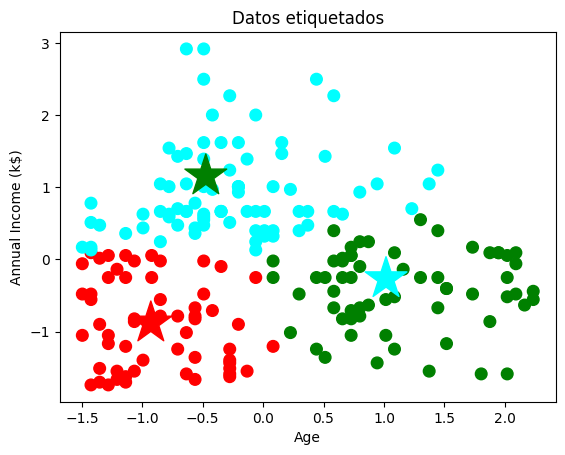

In [21]:
f1 = X['Age'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:,1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

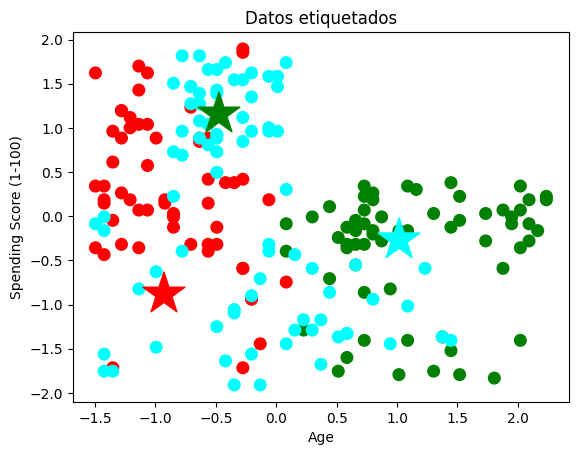

In [22]:
f1 = X['Age'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:,1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

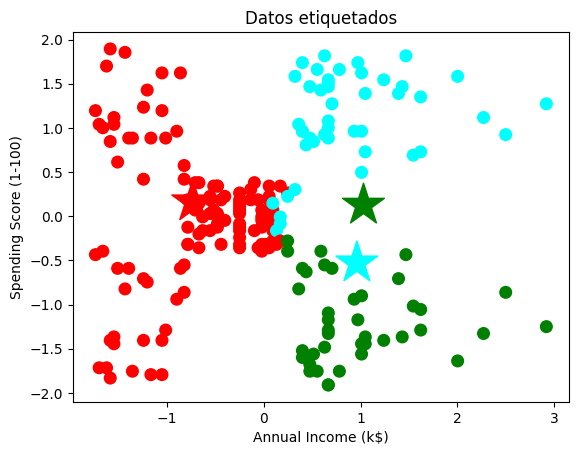

In [24]:
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:,1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [25]:
X_new = scaler.fit_transform(np.array([[4,23,16,77]]))
new_label = kmeans.predict(X_new)
color=[]
for row in new_label:
    color.append(colores[row])
print(new_label)
print(color)

[0]
['red']


In [26]:
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels))
print("Indice de Calinski-Marabasz:", metrics.calinski_harabasz_score(X, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels))


Medidas de calidad para K-Means:
Puntaje de silueta: 0.3465090192679
Indice de Calinski-Marabasz: 97.27522540427664
Inertia (suma de cuadrados dentro de los clusters): 402.5024097777318
Davies-Bouldin Index: 0.9496686247531457


## 6 Clusters

In [27]:
Z = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
Z

kmeans = KMeans(n_clusters=6).fit(Z)
centroids = kmeans.cluster_centers_
centroids

array([[ 1.06522456, -0.44191719,  0.99158305,  1.23950275],
       [ 0.14443249, -0.92683207,  0.11652757, -0.29454294],
       [-0.32158812,  1.22920391, -0.26141818, -0.03278265],
       [ 1.14959325,  0.39737911,  1.11508909, -1.23126963],
       [-1.19767716, -0.94964217, -1.15523145,  0.74012164],
       [-1.32330336,  0.5310735 , -1.2905084 , -1.23646671]])

In [28]:
labels = kmeans.labels_
C = kmeans.cluster_centers_
colore=['red','orange','yellow','blue', 'green','cyan']

asignar=[]
for row in labels:
    asignar.append(colore[row])

Z_new = scaler.fit_transform(np.array([[4,23,16,77]]))
new_label = kmeans.predict(Z_new)
color=[]
for row in new_label:
    color.append(colore[row])
print(new_label)
print(color)

[1]
['orange']


In [29]:
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(Z, labels))
print("Indice de Calinski-Marabasz:", metrics.calinski_harabasz_score(Z, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(Z, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.429652029872029
Indice de Calinski-Marabasz: 150.09760471139268
Inertia (suma de cuadrados dentro de los clusters): 164.32182952994287
Davies-Bouldin Index: 0.8170748572020806


## teniendo en cuenta el puntaje de silueta observamos que con 3 clusters obtenemos 0.34 y con 6 clusters obtenemos 0.42, lo cual indica que el valor más cercano a 1 seria con este último cluster, quedando mejor clasificado.

## Hierachical clustering

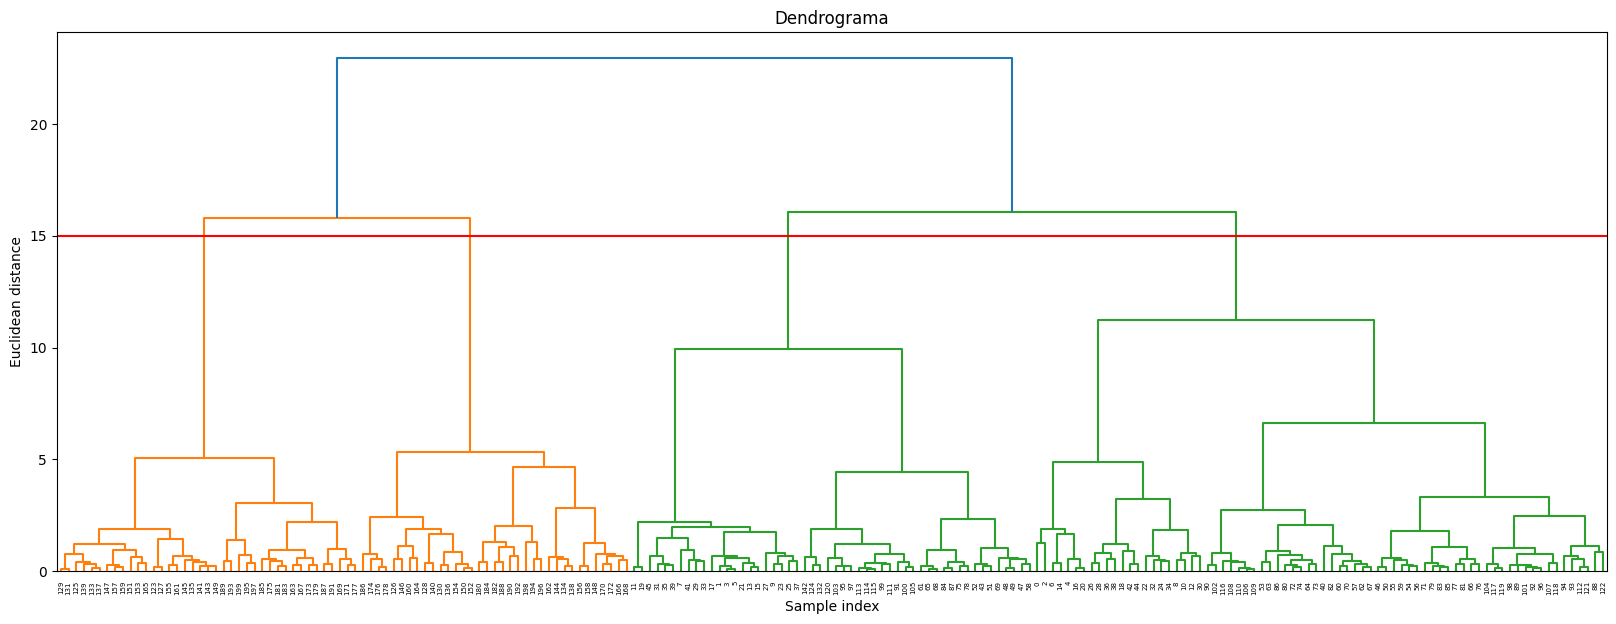

In [59]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20,7))
dendrogram(ward_clustering)
plt.axhline(y = 15, color = 'r', linestyle='-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [60]:
hier_clustering = AgglomerativeClustering(n_clusters=4)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 3, 2, 3, 1, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [62]:
labels = labels_hier
colores=['red','green','cyan','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])

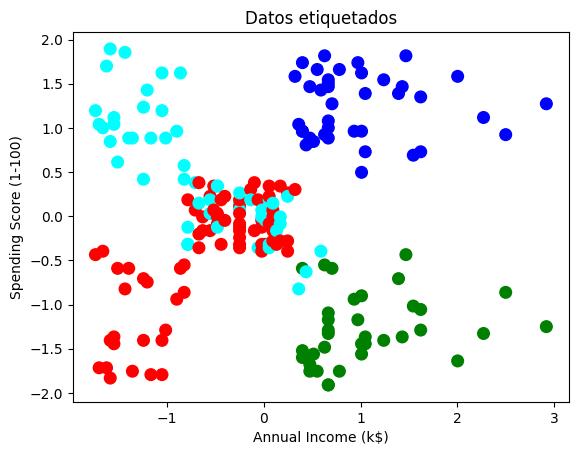

In [63]:
f1=X['Annual Income (k$)'].values
f2=X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

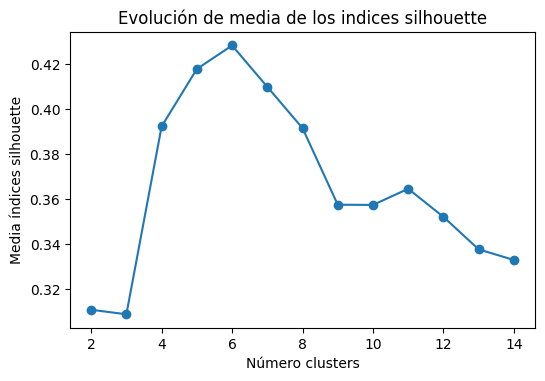

In [70]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
        metric = 'euclidean',
        linkage = 'ward',
        n_clusters = n_clusters
    )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los indices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [71]:
print("Medidas de calidad para Clustering jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))

Medidas de calidad para Clustering jerárquico:
Puntaje de silueta: 0.39231254266034143
índice de Calinski-Harabasz: 119.44498361793892
Davies-Bouldin Index: 0.9713829128749328


In [72]:
hier_clustering = AgglomerativeClustering(n_clusters=6)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 0, 5, 4, 2,
       4, 5, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 3, 2, 3, 1, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [73]:
print("Medidas de calidad para Clustering jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))

Medidas de calidad para Clustering jerárquico:
Puntaje de silueta: 0.42832993481997816
índice de Calinski-Harabasz: 143.6561433644843
Davies-Bouldin Index: 0.787609522022419


## teniendo en cuenta el puntaje de silueta observamos que con 4 clusters obtenemos 0.39 y con 6 clusters obtenemos 0. 42, lo cual indica que el valor más cercano a 1 seria con este último cluster, quedando mejor clasificado.

In [77]:
from scipy.cluster.hierarchy import linkage
X_dist = pdist(X)
Z = linkage(X, 'ward')
coef_cofenetico = cophenet(Z, X_dist)
print("coeficiente de correlación cofenética:", coef_cofenetico)

coeficiente de correlación cofenética: (np.float64(0.644982688580315), array([16.06037879,  1.28415501, 16.06037879, ..., 15.79117249,
        0.74388365, 15.79117249]))
